# LASSO (Least Absolute Shrinkage and Selection Operator)




Lasso Regression is an alternative to address the above discussed disadvantage of Ridge Regression. The objective of Lasso Regression is to find a column matrix or column vector, $\boldsymbol{\beta}$, that minimizes the sum of Residual Sum of Squares (RSS) and penalty equivalent to the sum of absolute value of coefficients, which is written as:
$$\text{Cost}_{Lasso}={RSS} + \lambda \sum_{j=1}^{d} \boldsymbol{\mid{\beta_j\mid}}= \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{d} \boldsymbol{\mid{\beta_j\mid}}= \sum_{i=1}^{n}\epsilon_i^2 + \lambda \sum_{j=1}^{d}\boldsymbol{\mid{\beta_j\mid}}$$

It can also be viewed as a minimization problem with *argmin* or "Argument of Minimum".

$$\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-\hat{y_i}]=\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-(\beta_{0} + \beta_{1}x_{i1} + \beta_{i2}x_{i2} + \cdots +\beta_{d}x_{id})]$$

*argmin* finds the coefficients that minimizes the $\text{RSS}$. The lasso constraint is $L_1$ vector norm and its equation is:

$$||\beta||_1^1={|\beta_{0}| + |\beta_{1}| + |\beta_{2}| + \cdots +|\beta_{d}|}$$

The lasso loss function with $argmin$ and vector norm is as shown below. Notice that the first term of the equation is OLS loss function and second term is lasso penalty.

$$\boldsymbol{\beta_{lasso}} = \underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}||y-X\beta||_2^2+\lambda||\beta||_1^1$$

In earlier chapter, we derived a closed form equation of Ridge Regression. But in general, LASSO doesn't have a closed form equation. Still we can find its solution using convex optimization form.

## Geometrical Intrepretation of Lasso Regression

Lasso Regression is also called L1 Regularization as it uses $L_1$ penalty i.e L1 norm of the parameter estimates. The $L_1$ norm is an absolute value function so, it is convex but not differentiable. The concept of L1 norm is used in its geometrical visualization in forming the L1 norm which is diamond shaped as shown in the figure below.

<figure align="center">
       <img src="https://i.postimg.cc/0y4LfzvQ/Geometrical-Intrepretation-of-Lasso-Regression.png" height="500" width="550">
       <figcaption>Figure 1: Geometrical Intrepretation of Lasso Regression </figcaption>
</figure>

If d=2, then the equation $$\boldsymbol{\sum_{j=1}^{d}}\boldsymbol{\mid\beta_j\mid \leq c}$$ equals $\boldsymbol{\mid\beta_1\mid+\mid\beta_2\mid \leq c}$, which is the equation of a diamond as shown in the figure.
Similarly, the term $(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$ is the OLS solution that generates an ellipse. The centre of the ellipse denotes the point in which the least square error(RSS) is minimum. The ellipse contour plot represents the residual sum of squares (RSS) increasing from inner ellipse to the outer ellipse quadratically. Likewise, the regularization curve is a 45 degree rotated square or a diamond.

The goal of this optimization problem is to find the point where the cost function is minimum. When $\lambda=0$, the $L_1$ norm diamond passes through the OLS estimate point where $\beta_1$ and $\beta_2$ gives the least RSS value. But the parameter chosen by OLS is prone to overfitting. So, we need to find that combination of $\beta_1$ and $\beta_2$ where the penalized loss function is minimum. For a particular lambda, we try to find the minimum point that L1 intersects with OLS. This minimum point is called lasso estimate point and the $\lambda$ at this point is the optimal value. This point of intersection of the ellipse and diamond is highly probable to fall on the axis line due to the sharp contour(spike) of diamond, unlike L2 regularisation where the ridge estimate can lie anywhere on the circumference of the circle.


### Lasso as a Feature Selection Method
In the above figure, the contours first intersect at one of the axes (y-axis). So $\beta_2=0$, which results in reduction of a feature and a non-zero coefficient $\beta_1$ remains. For dataset containing more number of features, more parameter estimates may result to zero due to the convergence of contours near the axes. So L1 Regression can be used as a feature selection method. Its geometric intrepretation can be visualized through $L_1$ norm of the figure above.

## Coordinate descent for Lasso Regression

Unlike Ridge Regression where we derived a closed form equation and perform gradient descent algorithm to find the solution, the solution of Lasso Regression can only be found using coordinate descent as the derivative of the absolute function ($L_1$norm) is undefined at $\beta$=0. Before implementing the concept of coordinate descent, we should know the idea behind it and also know why gradient descent doesn’t work. L1 norm is a piecewise linear function, so we cannot apply gradient descent on it. For a multivariable problem, gradient descent takes all the features and tries to minimize the cost function. But, coordinate descent takes one feature at a time and minimizes the cost function. It will help optimize the piecewise linear function by reducing the n-dimensional problem to n one-dimensional problem. We will now perform coordinate optimisation  and use the concept of sub-derivatives and subdifferentials. The coordinate descent helps in isolating $\beta$. We will be implementing this on OLS and penalty term respectively.

\begin{align*}
Cost_{lasso}(\beta) & = RSS_{OLS}(\beta) + \lambda \sum_{j=1}^{d} | \beta_j |
\\
&= \frac{1}{2} \sum_{i=1}^n \left[y_i - \sum_{j=0}^d \beta_j  x_{ij}\right]^2 + \lambda \sum_{j=1}^d |\beta_j|
\end{align*}

For the RSS term, we will calculate the gradient term for jth feature by separating the $\beta$ corresponding to jth feature. For this, we will perform summation with $k \neq j$ by separating the beta corresponding to jth feature.

\begin{align*}
\frac{\partial }{\partial \beta_j} RSS_{OLS}(\beta) & = -  \sum_{i=1}^n x_{ij}  \left[y_i - \sum_{j=0}^d \beta_j x_{ij}\right]
\\
& = -  \sum_{i=1}^n x_{ij}  \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} - \beta_j x_{ij}\right]
\\
& = -  \sum_{i=1}^n x_{ij} \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} \right] +  \beta_j \sum_{i=1}^n (x_{ij})^2
\\
& \triangleq - \rho_j + \beta_j z_j
\end{align*}

where $\rho_j=\sum_{i=1}^n x_{ij} \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} \right]$ and $z_j$ is the constant for normalization. If the features are normalized then $z_j$=1.

Using the concept of subdifferential as the modulus function $|\beta|$ isn't differentiable at $\beta$=0, we get

\begin{equation*}
\frac{\partial{}}{\partial\beta_j} \lambda \sum_{j=0}^d |\beta_j|  =
\begin{cases}
\ - \lambda \ & \text{if}\ \beta_j < 0 \\
[ - \lambda , \lambda ] & \text{if}\ \beta_j = 0 \\
\ \ \ \ \ \lambda \ & \text{if}\ \beta_j > 0
\end{cases}
\end{equation*}


Combining the differential of two terms using Moreau-Rockafeller Theorem and equating the equation to zero to find the minimum, we obtain:

\begin{align*}\partial_{\beta_j} Cost_{lasso}(\beta)  &= \partial_{\beta_j} RSS_{OLS}(\beta) + \partial_{\beta_j} \lambda | \beta_j| \\
0 & = -\rho_j + \beta_j z_j + \partial_{\beta_j} \lambda | \beta_j| \\
0 & = \begin{cases}-\rho_j + \beta_j z_j  - \lambda & \text{if}\ \beta_j < 0 \\
[-\rho_j  - \lambda ,-\rho_j + \lambda ] & \text{if}\ \beta_j = 0 \\
-\rho_j + \beta_j z_j +  \lambda  & \text{if}\ \beta_j >0
\end{cases}
\end{align*}

Solving the above equation, we get:
\begin{align*}\beta_j = \begin{cases}\frac{\rho_j + \lambda}{z_j}  & \text{for} \ \rho_j < - \lambda \\
0 & \text{for} \ - \lambda \leq \rho_j \leq \lambda \\
\frac{\rho_j - \lambda}{z_j}  & \text{for} \ \rho_j >\lambda
\end{cases}
\end{align*}

This is considered as soft thresholding function which optimizes the coordinates,
$$\beta_j=\frac{1}{z_j}{\text{S}(\rho_j,\lambda)}$$
where $\frac{1}{z_j}$=1 for normalized features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
alpha=1
no_of_iterations=5000

#Soft Thresholding to find the value of beta
def soft_threshold(rho,lm):
  if rho>lm:
    return rho-lm
  elif rho<-lm:
    return rho+lm
  else:
    return 0

#List comprehension to compare the soft threshold plot with OLS plot
x_val=np.arange(-5,5)
soft_value = [soft_threshold(item,1) for item in x_val]

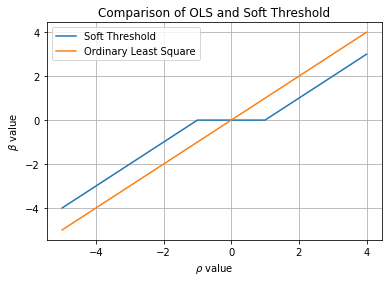

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Comparison of OLS and Soft Threshold')
plt.plot(x_val,soft_value,label='Soft Threshold')
plt.plot(x_val,x_val,label='Ordinary Least Square')
plt.xlabel('$\\rho$ value')
plt.ylabel('$\\beta$ value')
plt.legend()
plt.grid(True,linestyle='-')


from google.colab import files
plt.savefig("soft_threshold.png", dpi=100)

plt.show()
files.download("soft_threshold.png")

The figure above is the comparison of OLS and Soft Threshold function. Soft thresholding operator tries to shrink both negative and positive coefficient values ($\beta 's$) towards zero. We can see the straight line (in orange) being soft thresholded by $\lambda$=1 (in blue). For $\rho$ in the interval of $[-\lambda,\lambda]$, the $\beta$ value is equal to zero. For $\rho$ greater than $\lambda$ or $\rho<-\lambda$, the $\beta$ value are being shrinked towards zero.

## Implementation on Real World Dataset

For implementation of closed form Ridge Regression Equation we will use the [Boston House Prices Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

It is one of the datasets provided by sklearn. It has 506 instances with 13 numericals/categorical features of the Boston city. The *medv* variable is the target variable. It is the median value of owner-occupied homes per $1000.

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, HTML

In [ ]:
# Importing the dataset.
from sklearn.datasets import load_boston

#Load the dataset
boston_df=load_boston()

#Create dataframe of dataset
boston=pd.DataFrame(boston_df.data, columns= boston_df.feature_names)
boston['MEDV']=boston_df.target

#Print the first five samples
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# We train the model with features other than MEDV as it is the target variable
X=boston.drop(columns=['MEDV'])
y=boston['MEDV'].values.reshape(-1,1)

# Standardarization of the data i.e Mean=0, Standard Deviation=1
X = (X - X.mean())/X.std()

In [ ]:
# Bias/Intercept term to 1 for each samples
X=np.c_[np.ones((len(X),1)),X]

n = X.shape[0] # number of samples (rows)
d = X.shape[1] # number of features (columns)
print('No of samples:',n,'and No of features:',d)

No of samples: 506 and No of features: 14


In [ ]:
def initialize_betas(X, y):
  np.random.seed(0)
  betas = np.random.randn(d,1)
  return betas

betas = initialize_betas(X, y)
print(betas)

[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]]


We calculate the effect of one variable on all other variables in coordinate descent problem. So, we select a variable and see how it affects other variables.


## Coordinate Descent Update Rule


${\hspace{5cm}}$
$\text{Repeat until convergence }$\{
\begin{align*}\\
&\text{For j}=0,1,...,d\\
&\text{Calculate}\ \rho_j = \sum_{i=1}^n x_{ij}  (y_i  - \sum_{k \neq j}^d \beta_k x_{ik} )\\
&\text{Calculate}\ z_j = \sum_{i=1}^n (x_j)^2\\
&\text{Update}\ \beta_j = \frac{1}{z_j} S(\rho_j, \lambda)\\
\end{align*}
${\hspace{8cm}}\}$




In [ ]:
#Coordinate Descent Function

#Create a coordinate descent function accepting X, y, number of iterations and lambda
def coordinate_descent(X,y,no_of_iteration,lm):

  #Run the loop till the number of iterations
  for iter in range(no_of_iteration):

    # Looping to update each beta
    for j in range(0,len(betas)):

      #Create a temporary beta for executing k not equals j operation
      temp_beta=betas.reshape(-1,1)
      #To ignore the beta value of specified j
      temp_beta[j]=0.0
      #Rho calculation
      oper = (y - np.dot(X, temp_beta)).reshape(-1,1)
      rho= np.dot(X[:,j].T,oper)
      #Lambda value
      lamda=lm

      #Compute z_j term
      z_j=np.square(X[:,j]).sum()

      #Call softmax function and divide it by z_j term
      betas[j] = soft_threshold(rho,lamda)/z_j

  return betas

In [ ]:
# Formatting to display 2 decimal places only
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
#Run coordinate descent with X, y, number of iterations and lambda value
betas = coordinate_descent(X,y,1000,10)

# The beta values corresponding to the column
index=['BIAS','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']
pd.DataFrame(betas,columns=['Beta value'],index=index).T

,BIAS,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Beta value,22.51,-0.87,1.00,0.00,0.68,-1.93,2.70,0.00,-3.00,2.33,-1.76,-2.02,0.83,-3.73


We implemented the coordinate descent and found that the model reduced some coefficients to zero. This property of Lasso regression by which it sets less significant exactly equals to zero is called 'Feature Selection'. This can be visualized in the figure below. We can see that on using LASSO regression, the coefficients of some features are reduced to zero.


<figure align="center">
       <img src="https://i.postimg.cc/N0J7TXvJ/ols-vs-lasso-coefficients.png" height="300" width="450">
</figure>




## Key Takeaways
1. Lasso Regression penalizies every coefficients equally due to the modulus of coefficent values in penalty term.
2. $L_1$ norm is Diamond shaped in 2D space and Octahedron shaped in 3D space.
3. It performs coefficient shrinkage and feature selection by reducing the coefficients of less significant features exactly equal to zero.